# Detection of Fraudulent Credit Card Transactions Using Machine Learning

The main objective of this project is to detect anomalies and assist credit card organizations in taking relevant actions to prevent malicious activities related to fraudulent credit card transactions. It is crucial for credit card companies to recognize fraudulent transactions to ensure that customers are not charged for items they did not purchase.

The project encompasses end-to-end data analysis of transaction data to train a machine learning model capable of accurately predicting whether a transaction is fraudulent or normal. This involves data extraction, cleaning, and analysis to generate insights, followed by the development and training of a predictive model to enhance future fraud detection capabilities.

About the Dataset:

Source: (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where it has 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.

The data contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues,the original features (names) and more background information about the data are not given. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Import Fundamental Libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data

In [2]:
data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Shape of the Data

In [3]:
data.shape

(284807, 31)

Primary information about the Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The data consists of the datatype float in each column except the Class column which is having integer as the datatype.

Check for null values in every column

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null value(s) in the dataset.

Check for each class into the target variable.

In [6]:
class_count = pd.value_counts(data['Class'])
class_count

Class
0    284315
1       492
Name: count, dtype: int64

The data has 284315 entries as class '0' i.e. denotes normal transactions and remaining 492 entries as '1' i.e. fraud transactions.

Percentage of Fraud Transactions

In [7]:
fraud_percentage = round(((len(data[data['Class']==1])/len(data))*100),4)
print('Percentage of Fraud Transactions in the Dataset', fraud_percentage,'%')

Percentage of Fraud Transactions in the Dataset 0.1727 %


This denotes the dataset is highly imbalanced with respect to the proportion of binary class

Barplot representation of both the Classes

Text(0, 0.5, 'Frequency')

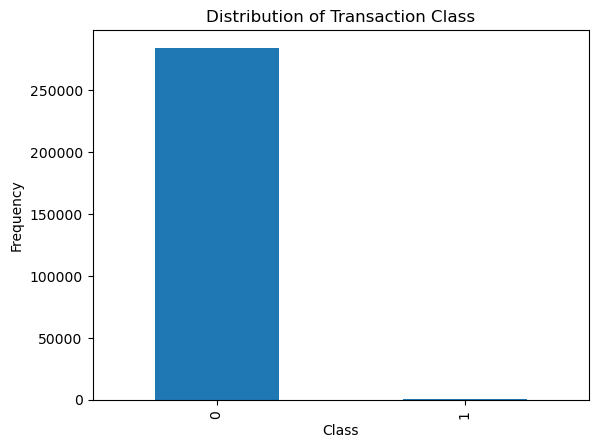

In [8]:
class_count.plot(kind = 'bar') 

plt.title("Distribution of Transaction Class")
plt.xlabel("Class")
plt.ylabel("Frequency")

Get the fraud and normal entries in separate datasets 

In [9]:
fraud_data = data[data['Class']==1]
normal_data = data[data['Class']==0]

Check the shape of both datasets

In [10]:
print('Size of Fraud Dataset: ', fraud_data.shape)
print('Size of Normal Dataset: ', normal_data.shape)

Size of Fraud Dataset:  (492, 31)
Size of Normal Dataset:  (284315, 31)


Get details of Amount that has been deducted in case of Fraud Transactions

In [11]:
fraud_data['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The maximum amount withdrawn in a fraudulent transaction is 2,125.87 EUR. On average, fraudulent credit card transactions result in a deduction of 122.20 EUR.

Get details of Amount that has been spent in case of Normal Transactions

In [12]:
normal_data['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Take a random sample from the main data

Here, 10% of the data has been chosen randomly as a sample data for better analysis.

In [13]:
df = data.sample(frac = 0.1, random_state = 42)
df.shape

(28481, 31)

Again split the sample data into two datasets containing Fraud and Normal transactions respectively

In [14]:
fraud_in_sample = df[df['Class']==1]
valid_in_sample = df[df['Class']==0]



Percentage of Fraud transactions in sample dataset

In [15]:
fraud_percentage_in_sample = round((len(fraud_in_sample)/len(df))*100, 4)
print('Percentage of Fraud Transactions in the Dataset', fraud_percentage_in_sample,'%')

Percentage of Fraud Transactions in the Dataset 0.1615 %


Thus, successfully maintained the proportion of the binary class in sample as well as in the main dataset.

Get the size of both the datasets.

In [16]:
print('Size of Fraud Sample Dataset: ', fraud_in_sample.shape)
print('Size of Normal Sample Dataset: ', valid_in_sample.shape)

Size of Fraud Sample Dataset:  (46, 31)
Size of Normal Sample Dataset:  (28435, 31)


Heatmap to show correlations among the features

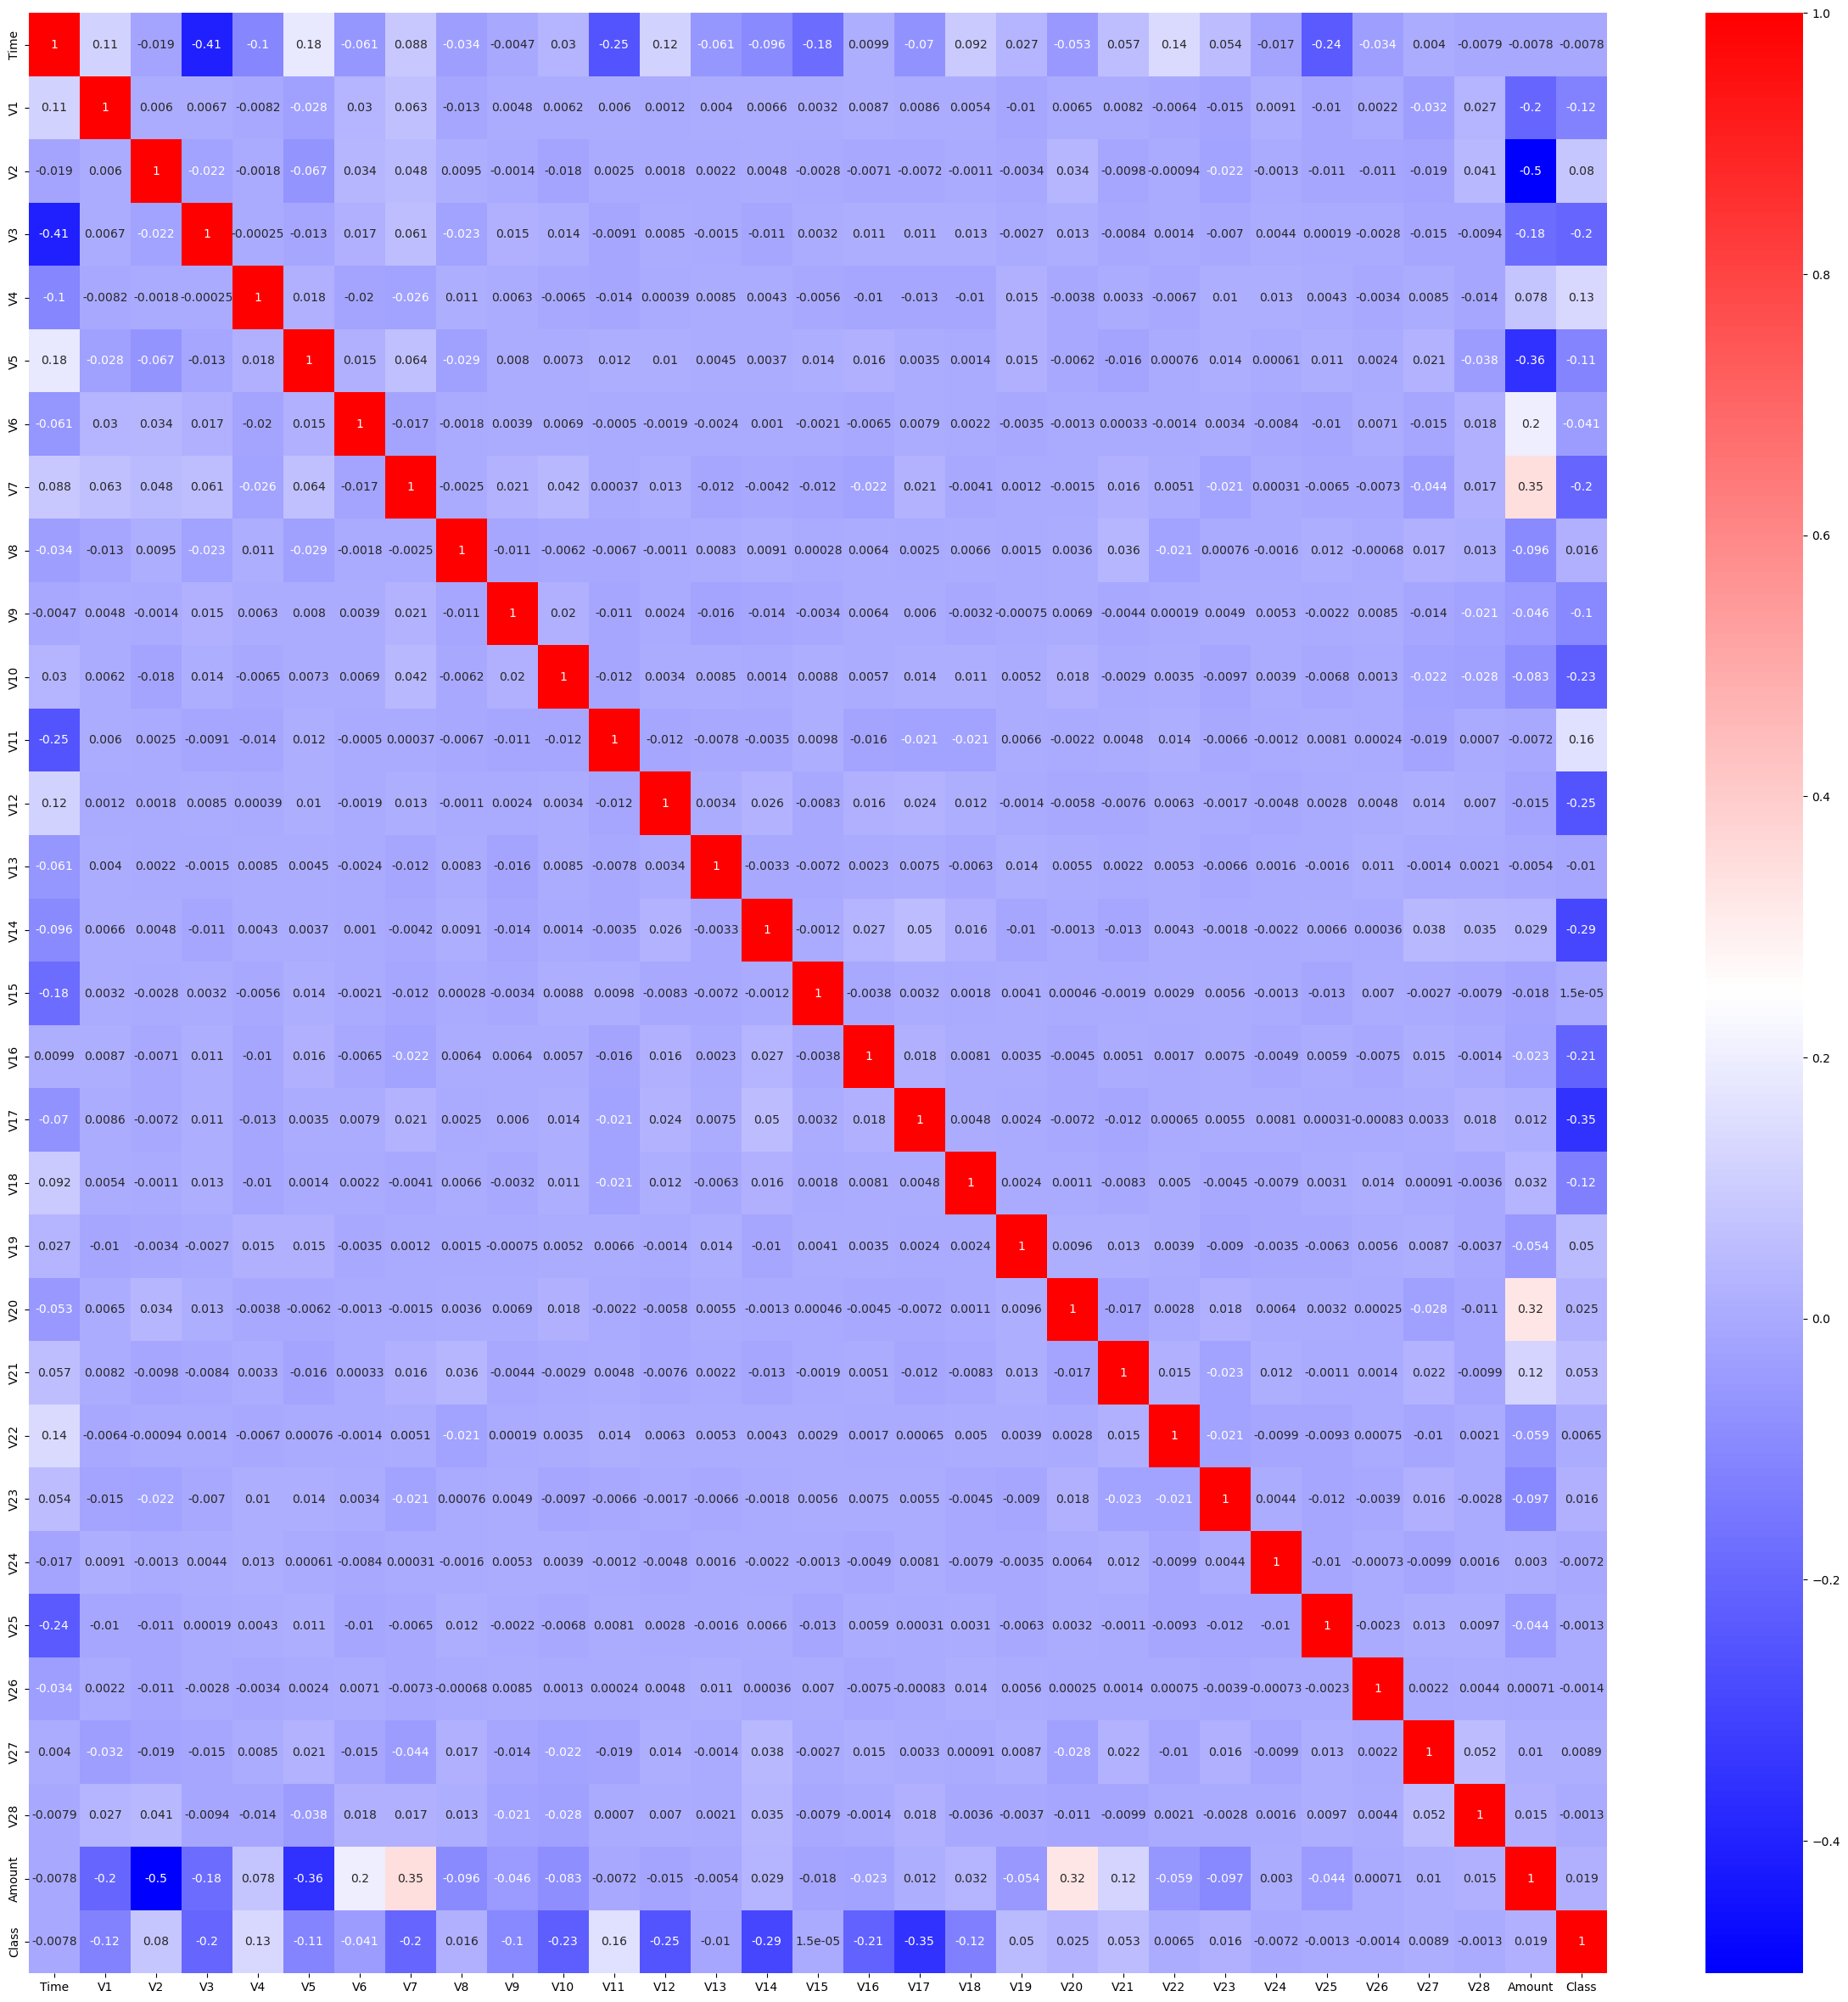

In [17]:
corr = df.corr()
corr_features = corr.index

plt.figure(figsize=(30,30))

g = sns.heatmap(df[corr_features].corr(), annot=True, cmap='bwr')

There are no highly correlated features identified in the heatmap.

Define features and target separately

In [18]:
features = [c for c in df.columns if c!= 'Class']
target = 'Class'
x = df[features]
y = df[target]

Check the shapes of x and y

In [19]:
print('Shape of x: ',x.shape)
print('Shape of y: ',y.shape)

Shape of x:  (28481, 30)
Shape of y:  (28481,)


Check the proportion of each classes

In [20]:
y.value_counts(normalize=True)

Class
0    0.998385
1    0.001615
Name: proportion, dtype: float64

Split the sample dataset into training and testing sets, with 70% of the data for training and the remaining 30% for testing. Ensure that the binary class proportions are maintained in both the original dataset and the split sets.

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

Ensure that the proportion of binary classes in the split data matches that of the original dataset.

In [22]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Class
0    0.998395
1    0.001605
Name: proportion, dtype: float64
Class
0    0.998362
1    0.001638
Name: proportion, dtype: float64


# Training ML Models

# Random Forest

Random Forest is an ensemble learning model primarily used for classification and regression tasks. It can effectively handle imbalanced classes by giving more weight to the minority class. The model builds multiple decision trees and aggregates their predictions, helping to mitigate the impact of noise and outliers, which are common in transaction data.

Random Forest can efficiently manage large datasets and high-dimensional data, making it suitable for the extensive and complex transaction data used in credit card fraud detection.

In this case, the model has been trained on balanced training data obtained using the oversampling technique (SMOTE), resulting in improved performance.

In [23]:
#import Random Forest
from sklearn.ensemble import RandomForestClassifier
#deal with imbalanced class
from imblearn.over_sampling import SMOTE

#initialize SMOTE 
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

#initialize Random Forest
RF = RandomForestClassifier(random_state=42)

#pass the resampled data
RF.fit(x_train_res, y_train_res)

#get the predictions
y_pred = RF.predict(x_test)

Obtain the Accuracy, Precision, Recall, and F1 Score to evaluate how well the model is making accurate predictions

In [24]:
from sklearn.metrics import classification_report, accuracy_score

print('Prediction score analysis of Random Forest:\n\n ',classification_report(y_test, y_pred))
print('The Accuracy score of the Random Forest model is: ',accuracy_score(y_test,y_pred))

Prediction score analysis of Random Forest:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00      8531
           1       0.93      0.93      0.93        14

    accuracy                           1.00      8545
   macro avg       0.96      0.96      0.96      8545
weighted avg       1.00      1.00      1.00      8545

The Accuracy score of the Random Forest model is:  0.9997659449970743


In the report, we observed a high recall score of 93%, indicating a low false negative rate. This means the model is highly effective at correctly predicting fraudulent transactions. Additionally, the model achieved a precision score of 93%, ensuring a low false positive rate, which enhances the model's overall accuracy.


ROC Curve and AUC Score

AUC score for Random Forest:  0.9999078989232547


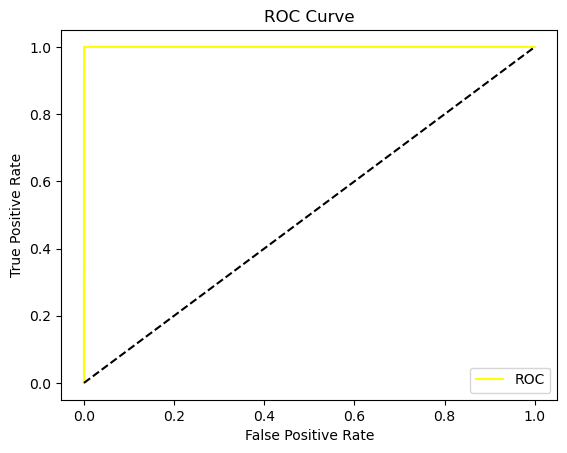

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='yellow', label='ROC')
    plt.plot([0,1],[0,1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    
probs = RF.predict_proba(x_test)
probs = probs[:,1]

print('AUC score for Random Forest: ',roc_auc_score(y_test,probs))

fpr, tpr, thresholds = roc_curve(y_test,probs)

plot_roc_curve(fpr,tpr)

The ROC curve above demonstrates the model's high accuracy, with an AUC score of approximately 0.99

# Logistic Regression

Logistic regression is effective for predicting fraudulent credit card transactions because it handles binary classification well, distinguishing between fraud and non-fraud. It provides probabilistic outputs, allowing easy interpretation of results. Logistic regression is also efficient with large datasets, and can handle multicollinearity effectively, making it suitable for financial data analysis.

In this case, the model has been trained on balanced training data obtained using the oversampling technique (SMOTE), resulting in improved performance.

In [26]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

#initialize model
LR = LogisticRegression(random_state=42)

#fit the model
LR.fit(x_train_res, y_train_res)

#get the predictions
y_pred = LR.predict(x_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Obtain the Accuracy, Precision, Recall, and F1 Score to evaluate how well the model is making accurate predictions

In [27]:
print('Prediction score analysis of Logistic Regression:\n\n ',classification_report(y_test, y_pred))
print('The Accuracy score of the Logistic Regression model is: ',accuracy_score(y_test,y_pred))

Prediction score analysis of Logistic Regression:

                precision    recall  f1-score   support

           0       1.00      0.98      0.99      8531
           1       0.07      1.00      0.13        14

    accuracy                           0.98      8545
   macro avg       0.54      0.99      0.56      8545
weighted avg       1.00      0.98      0.99      8545

The Accuracy score of the Logistic Regression model is:  0.9789350497366881


In the picture above, although we have achieved the highest recall score, the precision score is relatively low, indicating that the model has not effectively reduced the false positive rate.

ROC Curve and AUC Score

AUC score for Logistic Regression:  0.9998534755597234


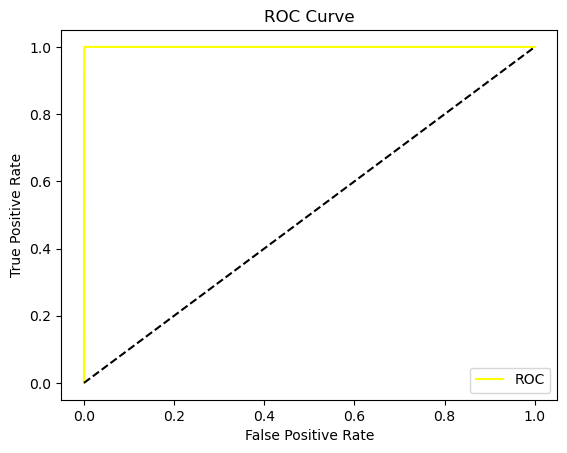

In [28]:
probs = LR.predict_proba(x_test)
probs = probs[:,1]

print('AUC score for Logistic Regression: ',roc_auc_score(y_test,probs))

fpr, tpr, thresholds = roc_curve(y_test,probs)

plot_roc_curve(fpr,tpr)

The ROC curve above demonstrates the model's high accuracy, with an AUC score of approximately 0.99

# Support Vector Machine

Support Vector Machines (SVM) are effective for predicting credit card fraud due to their ability to handle high-dimensional data and distinguish between classes with clear margins. They are robust against overfitting, especially in high-dimensional spaces, which is crucial for detecting rare fraudulent transactions. Additionally, SVMs can efficiently process non-linear relationships in data using kernel functions, enhancing their predictive accuracy for fraud detection.

In this case, the model has been trained on balanced training data obtained using the oversampling technique (SMOTE), resulting in improved performance.








In [29]:
#import svm
from sklearn.svm import SVC

#initialize svm
svc = SVC(probability=True, random_state=42)

#fit the model
svc.fit(x_train_res, y_train_res)

#get the predictions
y_pred = svc.predict(x_test)

Obtain the Accuracy, Precision, Recall, and F1 Score to evaluate how well the model is making accurate predictions

In [30]:
print('Prediction score analysis of Support Vector Machine:\n\n ',classification_report(y_test, y_pred))
print('The Accuracy score of the Support Vector Machine is: ',accuracy_score(y_test,y_pred))

Prediction score analysis of Support Vector Machine:

                precision    recall  f1-score   support

           0       1.00      0.60      0.75      8531
           1       0.00      0.50      0.00        14

    accuracy                           0.60      8545
   macro avg       0.50      0.55      0.38      8545
weighted avg       1.00      0.60      0.75      8545

The Accuracy score of the Support Vector Machine is:  0.6028086600351082


The model has demonstrated a low recall score and the lowest accuracy score, indicating its poor performance in predicting outcomes.

ROC Curve and AUC Score

AUC score for Support Vector Machine:  0.5684562184972453


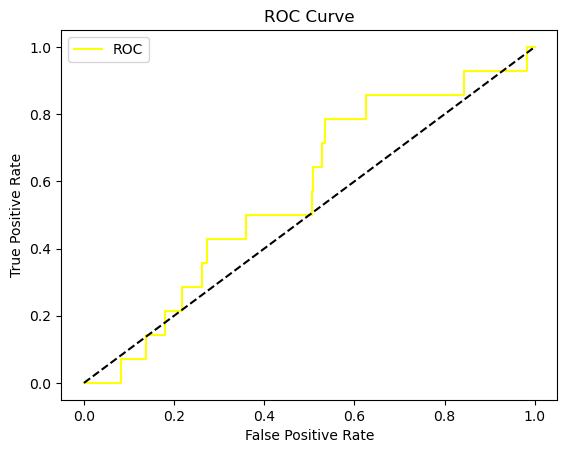

In [31]:
probs = svc.predict_proba(x_test)
probs = probs[:,1]

print('AUC score for Support Vector Machine: ',roc_auc_score(y_test,probs))

fpr, tpr, thresholds = roc_curve(y_test,probs)

plot_roc_curve(fpr,tpr)

The curve in the image is nearly aligned with the diagonal line, which represents the performance of a naive model. This results in a relatively poor ROC curve with an AUC score of 0.57.

Observations:
    
1. The Random Forest model achieves a balanced performance with both precision and recall scores of 0.93. In contrast, Logistic Regression demonstrates a high recall close to 1 but has a significantly lower precision of 0.07, indicating that it tends to classify almost every future transaction as fraudulent, which limits its practical usefulness. Meanwhile, the SVM model shows a recall score of 0.50 and a precision score of 0, suggesting that it performs poorly overall and is not effective for this particular task.


2. The Random Forest model achieved an impressive accuracy score of 99.98%, slightly outperforming the Logistic Regression model, which had an accuracy of 97.89%. In contrast, the Support Vector Machine (SVM) model demonstrated a significantly lower accuracy of 56.85%.


3. Overall, the Random Forest method outperformed the other two models in detecting fraudulent transactions.


4. We can also improve on this accuracy by increasing the sample size or using deep learning algorithms however at the cost of computational expense. We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases. 